# Bank Customer Churn Prediction Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Bank_churn.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Get unique count for each feature
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Ignorning insignificant columns

In [336]:
#Clearly Rownumber , customder id and surname are less important columns

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [337]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# Target check for balanced or Imbalanced data

In [338]:
round(df['Exited'].value_counts()/len(df)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='count'>

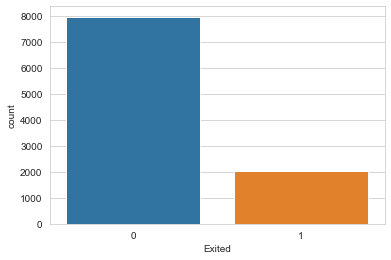

In [339]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=df)

In [340]:
#80 percent of the data belongs to one class .It is Imbalanced data .
#Solution : Use SMOTE to handle this or the Precision -Recall curve should be used not accuracy .

# Describe Function

In [341]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [342]:
#We see outliers in  balance column otherwise others are fine 

# Duplicate data Check 

In [343]:
df[df.duplicated()] 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Missing Value Check 

In [344]:
df.isna().sum()/len(df)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [345]:
#So far we are good , no missing value no duplicate .

# Correlation check 

<AxesSubplot:>

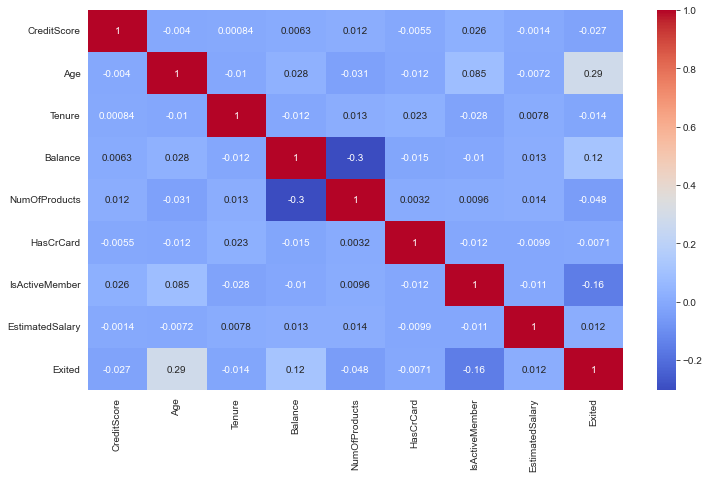

In [346]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)

In [347]:
#We are good with correlation too 

# Univariate and Bivariant Analaysis

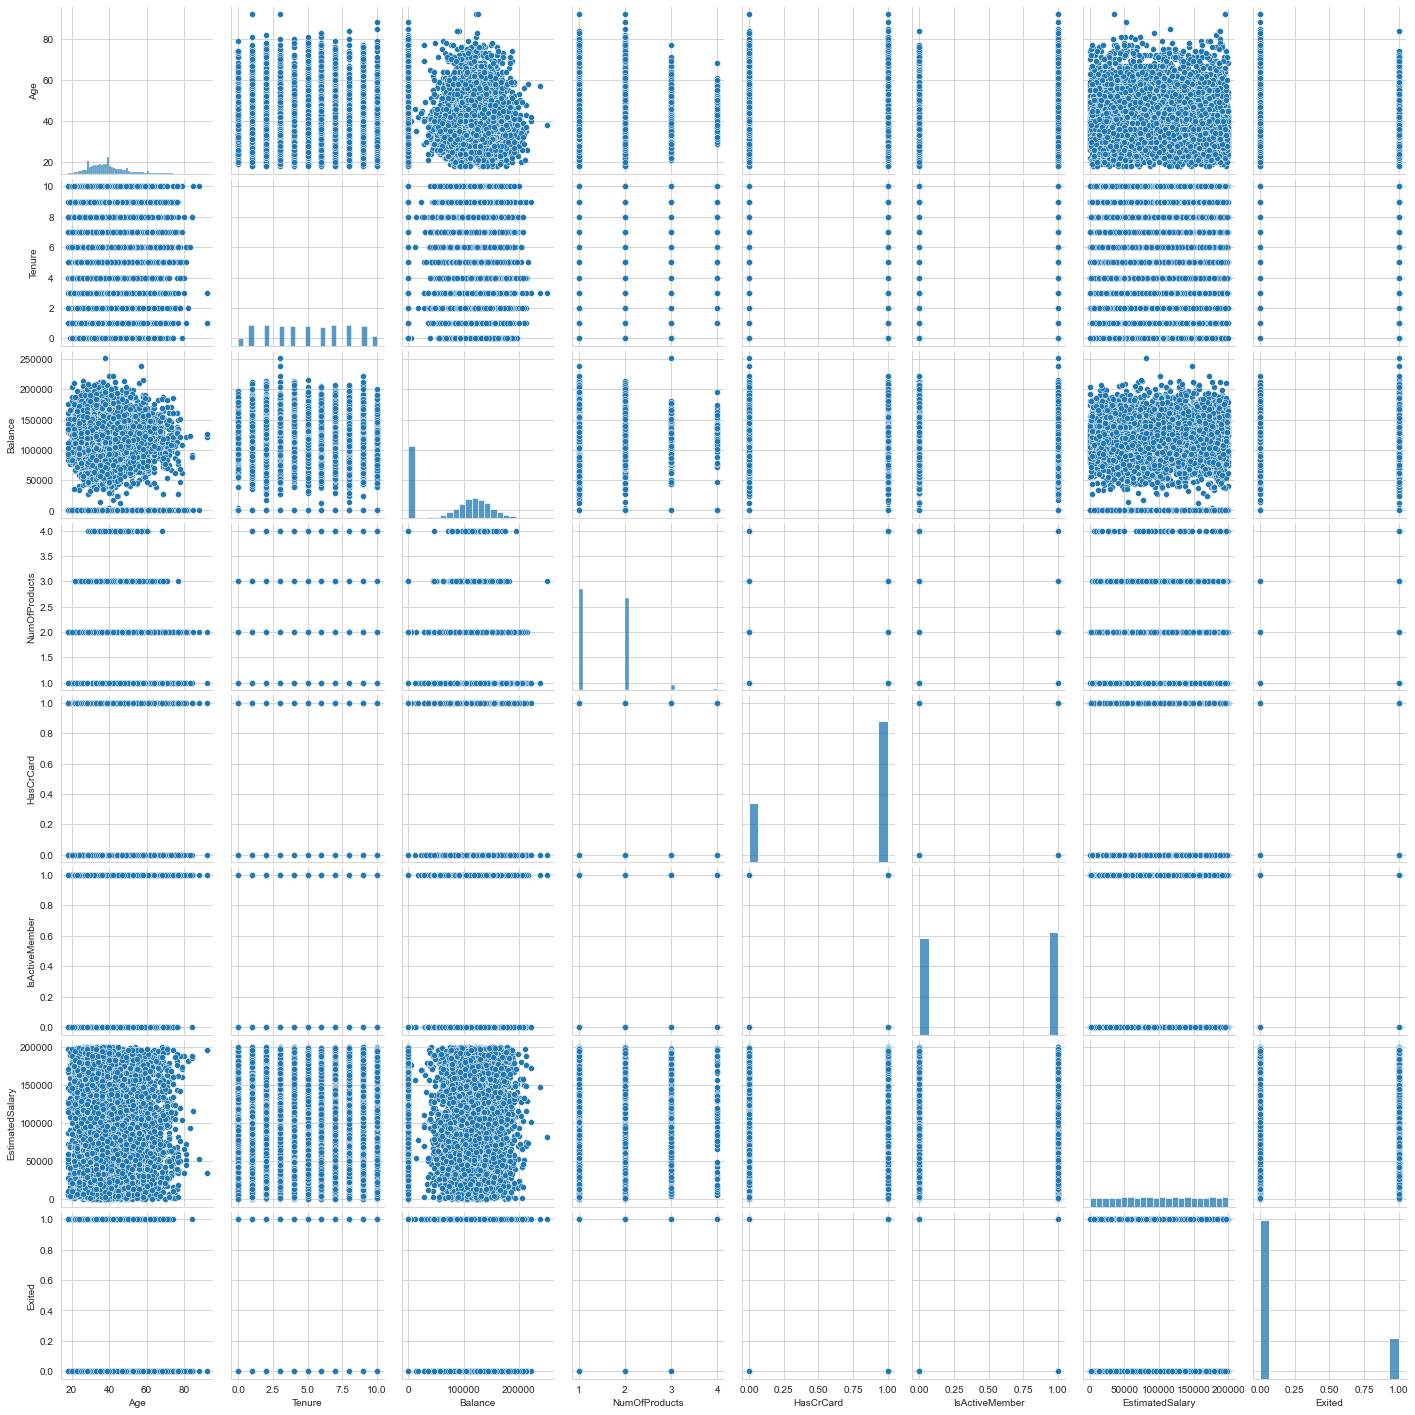

In [501]:
import seaborn as sns
sns.pairplot(df)
# to show
plt.show()

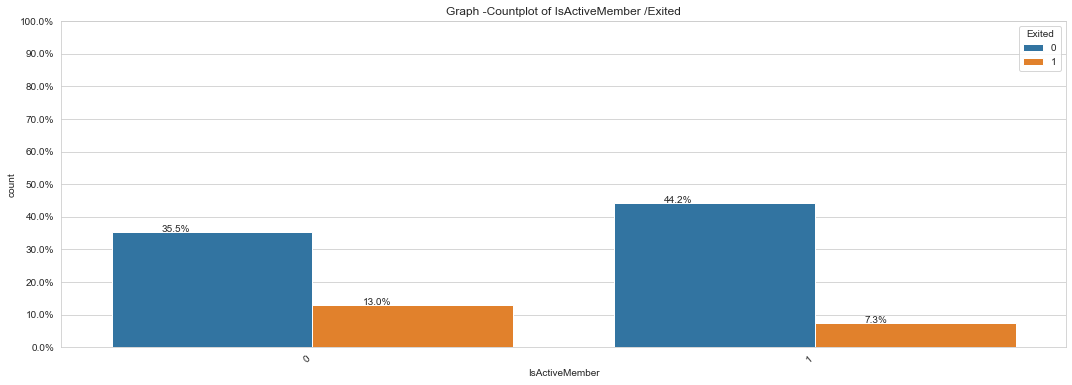

In [348]:
# check the count of customers who exited the bank and was active member 

plt.figure(figsize=(18,6))
Y = df['IsActiveMember']
total = len(Y)*1.
ax=sns.countplot(x="IsActiveMember", data=df,hue="Exited")

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Graph -Countplot of IsActiveMember /Exited')
plt.show()

# Insight -> In churned category( category =1) most of them are not active member .

<AxesSubplot:xlabel='Exited', ylabel='count'>

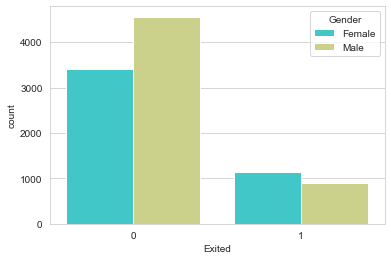

In [349]:
# check for the genderwise count of customers who 'exited' from bank

sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=df,palette='rainbow')

# Insight -> In the churned category , count of female is more than that of males

<AxesSubplot:>

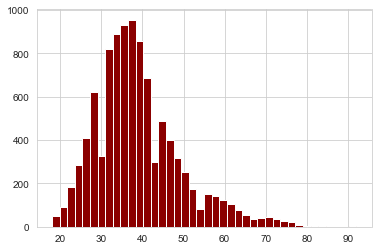

In [350]:
# check the histogram for all customers agewise

df['Age'].hist(bins=40,color='darkred',alpha=1.0)


In [351]:
conditions = [
    (df['Age'] >= 0) & (df['Age'] <= 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60)
]

values = ['Minors', '18-30', '30-55','50-60','>60']

df['Age1'] = np.select(conditions, values)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age1
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-55
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-55
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-55
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-55
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-55


In [352]:
round(df['Age1'].value_counts()/len(df)*100,2)

30-55     69.64
18-30     16.19
50-60      8.69
>60        5.26
Minors     0.22
Name: Age1, dtype: float64

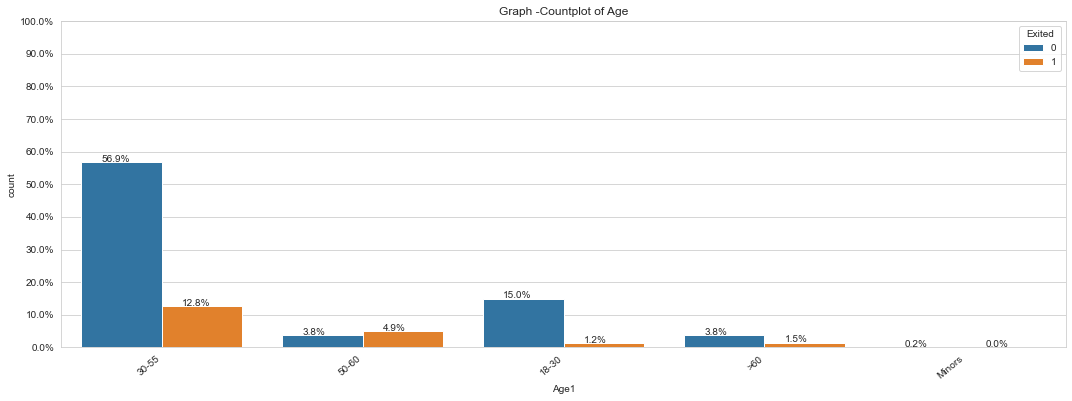

In [353]:
plt.figure(figsize=(18,6))
Y = df['Age']
total = len(Y)*1.
ax=sns.countplot(x="Age1", data=df,hue="Exited")

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Graph -Countplot of Age')
plt.show()

# Insight -> Most of the customer exiting are adults(30-55 age)

<AxesSubplot:>

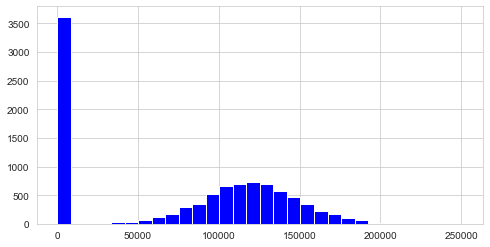

In [354]:
# histogram for average balance customers have in there account

df['Balance'].hist(color='blue',bins=30,figsize=(8,4))

In [355]:
round(df['Balance'].value_counts()/len(df)*100,2)

0.00         36.17
130170.82     0.02
105473.74     0.02
85304.27      0.01
159397.75     0.01
             ...  
81556.89      0.01
112687.69     0.01
108698.96     0.01
238387.56     0.01
130142.79     0.01
Name: Balance, Length: 6382, dtype: float64

# Insight -> 36% of the account is having Zero balance 

In [356]:
#Lets see if those accounts are active or not 
x0=df[df['Balance'] <= 1]

In [357]:
x0

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age1
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,30-55
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0,30-55
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0,50-60
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,18-30
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0,30-55
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0,18-30
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0,30-55
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0,18-30
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0,30-55


In [358]:
# sns.set_style('whitegrid')
# sns.countplot(x='Balance',hue='Exited',data=x0,palette='rainbow')

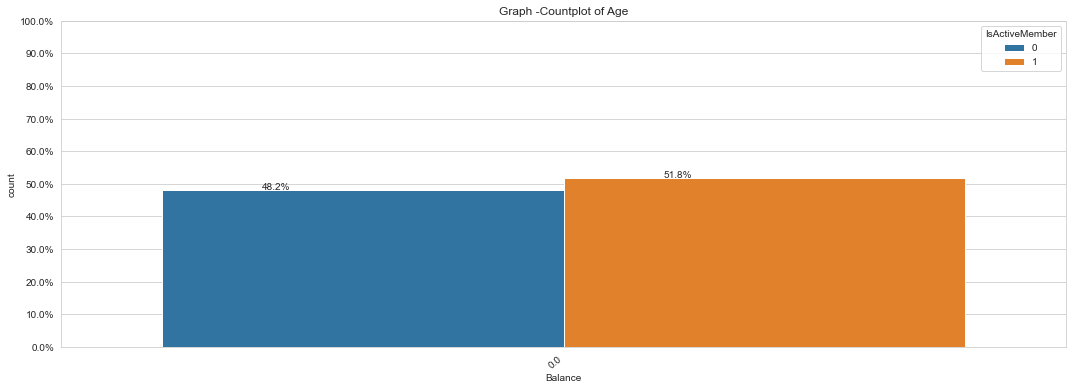

In [359]:
plt.figure(figsize=(18,6))
Y = x0['Balance']
total = len(Y)*1.
ax=sns.countplot(x="Balance", data=x0,hue="IsActiveMember")

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Graph -Countplot of Age')
plt.show()

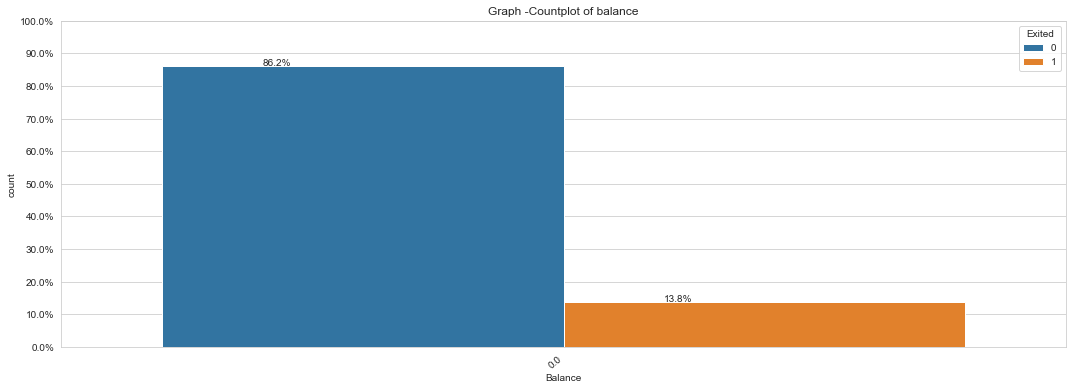

In [360]:
plt.figure(figsize=(18,6))
Y = x0['Balance']
total = len(Y)*1.
ax=sns.countplot(x="Balance", data=x0,hue="Exited")

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Graph -Countplot of balance')
plt.show()

# 50% of 0 balance accouts are active  and are not exiting .


<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

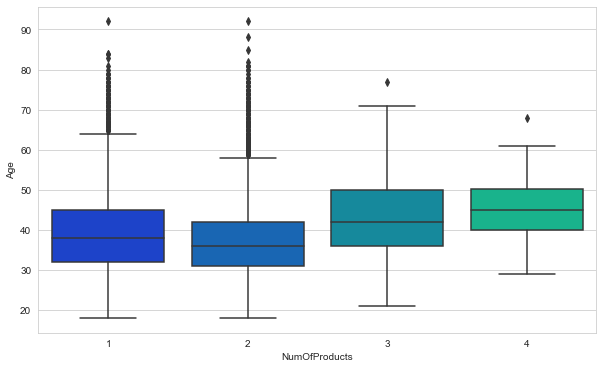

In [361]:
# agewise  active products 
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumOfProducts',y='Age',data=df,palette='winter')

In [362]:
#We can drop Age1 column now , that was created for analysis

In [363]:
df.drop(columns=['Age1'],inplace=True)

In [364]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [365]:
#14.2% of people exiting do have the credit card 

In [366]:
conditions = [
    (df['CreditScore'] >= 300) & (df['CreditScore'] <= 550),
    (df['CreditScore'] >= 550) & (df['CreditScore'] < 650),
    (df['CreditScore'] >= 650) & (df['CreditScore'] < 750),
    (df['CreditScore'] >= 750) & (df['CreditScore'] < 850),
    (df['CreditScore'] >= 850)
]

values = ['Poor', 'Average', 'Good','Vgood','Excellent']

df['CreditScore'] = np.select(conditions, values)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Average,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Average,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Poor,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Good,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


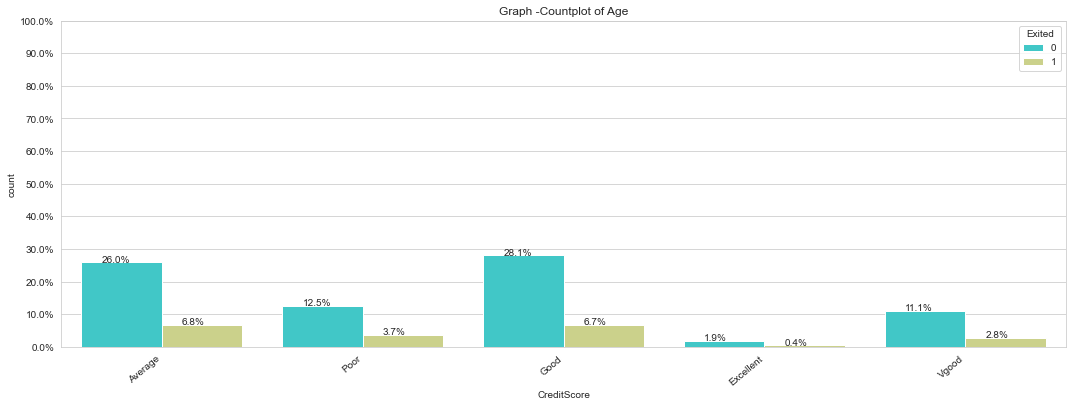

In [367]:
plt.figure(figsize=(18,6))
Y = df['CreditScore']
total = len(Y)*1.
ax=sns.countplot(x='CreditScore',hue='Exited',data=df,palette='rainbow')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Graph -Countplot of Age')
plt.show()

In [368]:
#People with Credit score from 550 to 750 have more chances of churning 

In [369]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Average,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Average,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Poor,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Good,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

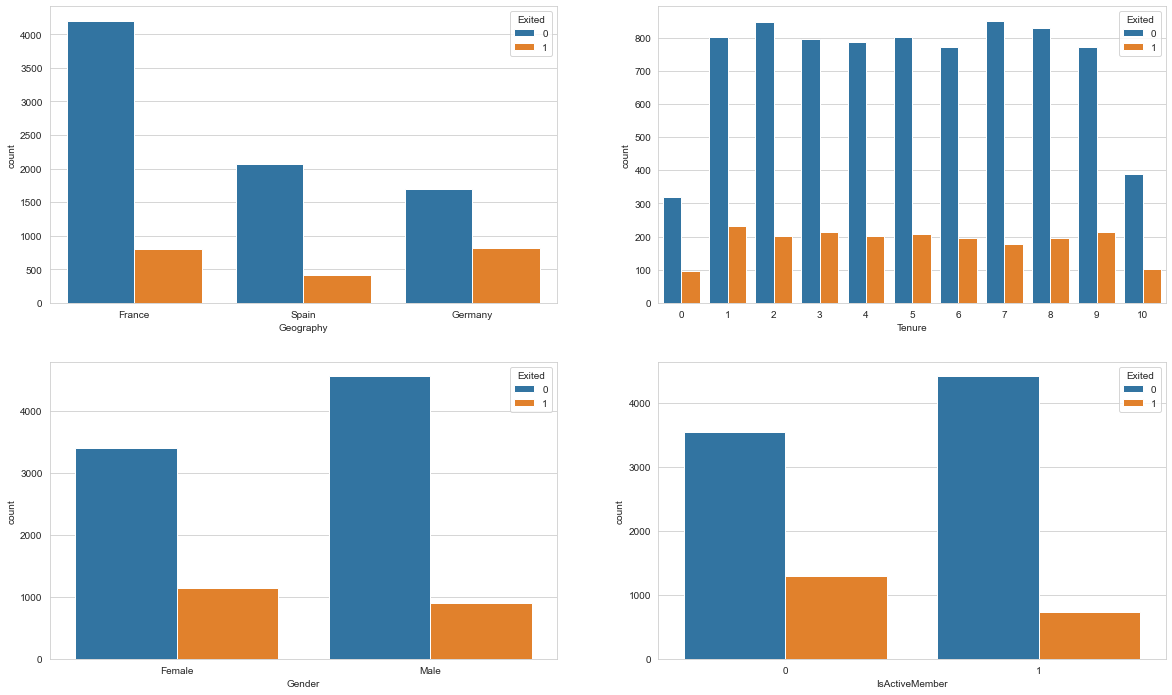

In [370]:
fig, axarr = plt.subplots(2,2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [371]:
#Churn rate in more by female customers
#Customers who are not active members are churning more , Bank needs to  check with the customers for being inactive , give them some offers plan.
#

In [372]:
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline


In [373]:
x=df.drop(columns=['Exited'])
y  = df['Exited']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print("Shape of X_train:" ,x_train.shape)
print("Shape of X_test:" ,x_test.shape)

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [374]:
unique, count = np.unique(y_train ,return_counts= True)
target_org_valuecount= {k:v for (k,v) in zip (unique,count)}
target_org_valuecount

{0: 6356, 1: 1644}

In [375]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,Average,Germany,Male,32,3,96709.07,2,0,0,41788.37
4684,Average,France,Male,43,1,0.00,2,1,1,146379.30
1731,Average,Spain,Female,44,4,0.00,2,1,0,58561.31
4742,Poor,Germany,Male,59,8,119152.10,2,1,1,170679.74
4521,Average,Spain,Female,27,7,124995.98,1,1,1,114669.79


In [376]:
categorical_cols = ['CreditScore','Geography', 'Gender']


numerical_cols = ['Age',
                  'Tenure',
                  'Balance',
                  'NumOfProducts',
                  'HasCrCard',
                  'IsActiveMember',
                  'EstimatedSalary']

# Encoding and Scaling

In [377]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# SMOTE

In [378]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)

# Logistic Model

In [379]:
logmodel=LogisticRegression()

# Pipeline

In [380]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('logmodel', logmodel)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['CreditScore', 'Geography',
                                                   'Gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('logmodel', LogisticRegression())])

In [381]:
y_predicted = pipe.predict(x_test)

In [382]:
y_predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [383]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [384]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.708875
Testing score:  0.7235
MSE score:  0.2765
Accuracy: 0.72
Precision: 0.39
Recall: 0.72
F1-score: 0.50


In [385]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[1166,  441],
       [ 112,  281]], dtype=int64)

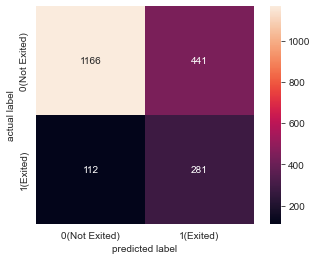

In [386]:
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Exited)', '1(Exited)'],
                        yticklabels=['0(Not Exited)', '1(Exited)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [387]:
y_test.value_counts()

0    1607
1     393
Name: Exited, dtype: int64

In [388]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

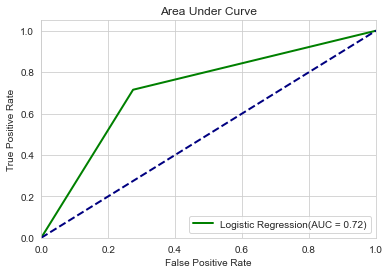

In [389]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

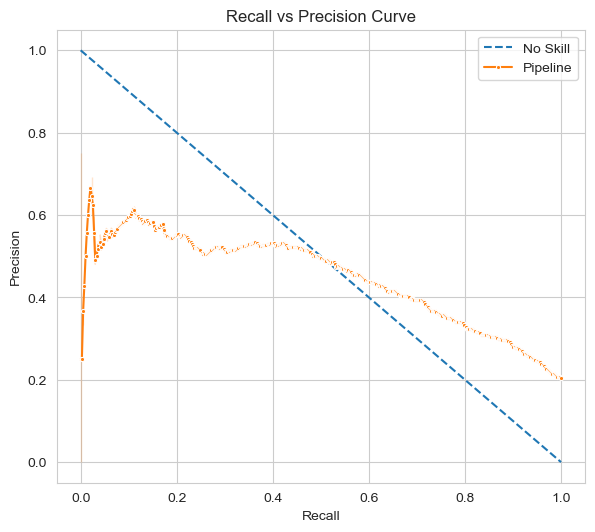

In [390]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve

yhat = pipe.predict_proba(x_test)
precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
plt.figure(dpi=100, figsize=(15, 6))
plt.subplot(121)
sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
sns.lineplot(recall, precision, marker='.', label=pipe.__class__.__name__)
plt.title("Recall vs Precision Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
        

# DECISION TREE

In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [392]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=6, criterion = "gini",
                                   min_samples_split=100,
                                   min_samples_leaf=40)

In [393]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('decision_tree', decision_tree)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['CreditScore', 'Geography',
                                                   'Gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=40,
                                        min_samples_split=100,
                                        random_state=42))])

In [394]:
y_predicted = pipe.predict(x_test)

In [395]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.791875
Testing score:  0.7845
MSE score:  0.2155
Accuracy: 0.78
Precision: 0.47
Recall: 0.73
F1-score: 0.57


In [396]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[1281,  326],
       [ 105,  288]], dtype=int64)

# Random Forest Model 

In [445]:
random_forest = RandomForestClassifier(max_depth=12,
                                       n_estimators = 100, random_state=42,
                                       bootstrap=True,
                                       max_features='auto',
                                        min_samples_split=100,
                                   min_samples_leaf=40)

In [446]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('random_forest', random_forest)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['CreditScore', 'Geography',
                                                   'Gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('random_forest',
                 RandomForestClassifier(max_depth=12, min_samples_leaf=40,
                                        min_samples_split=100,
                                        random_state=42))])

In [447]:
y_predicted = pipe.predict(x_test)

In [452]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.838875
Testing score:  0.825
MSE score:  0.175
Accuracy: 0.82
Precision: 0.54
Recall: 0.72
F1-score: 0.62


In [449]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[1367,  240],
       [ 110,  283]], dtype=int64)

# Boosting Algorithms

In [494]:
# import xgboost as xgb
# xgb = xgb.XGBClassifier()

In [495]:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('smote', smt),
#                             ('xgb', xgb)
#                           ])

# # Preprocessing of training data, fit model 
# pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['CreditScore', 'Geography',
                                                   'Gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsam...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                          

In [496]:
# y_predicted = pipe.predict(x_test)

In [497]:
# from sklearn.metrics import mean_squared_error as MSE
# print("Training score: ",pipe.score(x_train, y_train))

# print("Testing score: ",pipe.score(x_test, y_test))

# print("MSE score: ",MSE(y_test,y_predicted))

# print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
# print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
# print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
# print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Training score:  0.93975
Testing score:  0.854
MSE score:  0.146
Accuracy: 0.85
Precision: 0.66
Recall: 0.53
F1-score: 0.59


In [498]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,y_predicted)

array([[1500,  107],
       [ 185,  208]], dtype=int64)